In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

%matplotlib inline

In [ ]:
## Chargement des données de modélisation

In [15]:
df = pd.read_csv("../../data/processed/lieu-compteur-classes-one-hot-encoded.csv", index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1204344 entries, 57773 to 1039253
Data columns (total 76 columns):
 #   Column                                                                 Non-Null Count    Dtype 
---  ------                                                                 --------------    ----- 
 0   Jour                                                                   1204344 non-null  int64 
 1   Mois                                                                   1204344 non-null  int64 
 2   Année                                                                  1204344 non-null  int64 
 3   Heure                                                                  1204344 non-null  int64 
 4   Jour_semaine                                                           1204344 non-null  int64 
 5   Jour férié                                                             1204344 non-null  int64 
 6   Vacances scolaires                                                     1204

In [ ]:
## Renommage des classes et processing variables catégorielles

In [16]:
y = df["Comptage horaire"].replace({
    "0-3": "[00] 0-3",
    "4-9": "[01] 4-9",
    "10-18": "[02] 10-18",
    "19-31": "[03] 19-31",
    "32-46": "[04] 32-46",
    "47-64": "[05] 47-64",
    "65-86": "[06] 65-86",
    "87-115": "[07] 87-115",
    "116-155": "[08] 116-155",
    "156-230": "[09] 156-230",
    "231-450": "[10] 231-450",
    "451+": "[11] 451+",
})
X = df.drop(columns=["Comptage horaire"])

col_norm = ["Jour", "Mois", "Année", "Heure", "Jour_semaine", "Jour férié", "Vacances scolaires"]
encoder = preprocessing.OneHotEncoder(sparse_output=False, dtype=int) 

array = encoder.fit_transform(X[col_norm])

encoded_df_clean = pd.DataFrame(array, columns=encoder.get_feature_names_out(col_norm))

encoded_df_clean.index = X.index

X_clean = pd.concat([X.drop(columns=col_norm), encoded_df_clean], axis=1)

In [17]:
X_clean.head()

,Nom du site de comptage_10 avenue de la Grande Armée,Nom du site de comptage_10 boulevard Auguste Blanqui,Nom du site de comptage_102 boulevard de Magenta,Nom du site de comptage_106 avenue Denfert Rochereau,Nom du site de comptage_129 rue Lecourbe,Nom du site de comptage_132 rue Lecourbe,Nom du site de comptage_135 avenue Daumesnil,Nom du site de comptage_147 avenue d'Italie,Nom du site de comptage_152 boulevard du Montparnasse,Nom du site de comptage_16 avenue de la Porte des Ternes,...,Jour_semaine_2,Jour_semaine_3,Jour_semaine_4,Jour_semaine_5,Jour_semaine_6,Jour_semaine_7,Jour férié_0,Jour férié_1,Vacances scolaires_0,Vacances scolaires_1
57773,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1092998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1171485,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
57487,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
57812,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
## Encodage variable cible

In [18]:
label_enc = LabelEncoder()
y = label_enc.fit_transform(y)

In [19]:
y

array([11, 11, 11, ...,  0,  0,  0])

In [ ]:
## Séparation datasets d'entrainement et de test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

In [8]:
params = {
    # 'loss': ['squared_error'],
    # 'squared_error', 'huber', 'epsilon_insensitive'
    'alpha': 10.0**-np.arange(3,7),
}

In [ ]:
## Grid Search CV

In [13]:
sgd = SGDClassifier(loss='log_loss')
clf = GridSearchCV(sgd, params, scoring='accuracy', n_jobs=-1, verbose=2)
clf.fit(X_train, y_train)
print("train score", clf.score(X_train, y_train))
print("test score", clf.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .......................................alpha=0.0001; total time=24.0min
[CV] END .......................................alpha=0.0001; total time=24.0min
[CV] END ........................................alpha=1e-05; total time=30.8min
[CV] END ........................................alpha=1e-05; total time=30.9min
train score 0.3435138431199564
test score 0.3424184930397851


In [14]:
print("best params", clf.best_params_)
print("best score", clf.best_score_)

best params {'alpha': 0.0001}
best score 0.34306961778977146


In [21]:
clf = SGDClassifier(loss='log_loss', alpha=0.0001)
clf.fit(X_train, y_train)
print("train score", clf.score(X_train, y_train))
print("test score", clf.score(X_test, y_test))

train score 0.34436908067152755
test score 0.3427132590744347


In [22]:
y_pred = clf.predict(X_test)

In [23]:
y_test = label_enc.inverse_transform(y_test)
y_pred = label_enc.inverse_transform(y_pred)

In [ ]:
## Matrice de confusion

In [24]:
matrice_confusion = pd.crosstab(y_test, y_pred, rownames=['Classes réelles'], colnames=['Classes prédites'])
matrice_confusion

Classes prédites,[00] 0-3,[01] 4-9,[02] 10-18,[03] 19-31,[04] 32-46,[05] 47-64,[06] 65-86,[07] 87-115,[08] 116-155,[09] 156-230,[10] 231-450,[11] 451+
Classes réelles,,,,,,,,,,,,
[00] 0-3,12528,4977,296,1390,269,707,249,49,275,534,354,137
[01] 4-9,4966,10423,774,3232,514,315,124,40,68,46,55,49
[02] 10-18,2086,7984,1945,4841,1585,945,376,174,211,92,97,62
[03] 19-31,1381,3836,2329,5672,2756,2908,917,330,370,207,274,164
[04] 32-46,1104,1255,1681,3993,2377,5814,2079,666,582,314,418,173
[05] 47-64,987,432,1060,2581,1344,6739,3900,1665,1129,547,590,186
[06] 65-86,993,194,623,1599,613,4185,5015,3280,2512,840,733,196
[07] 87-115,819,73,477,1169,362,1628,4110,4520,5005,1696,1103,268
[08] 116-155,763,32,242,869,285,827,1839,2910,6868,3282,2190,340


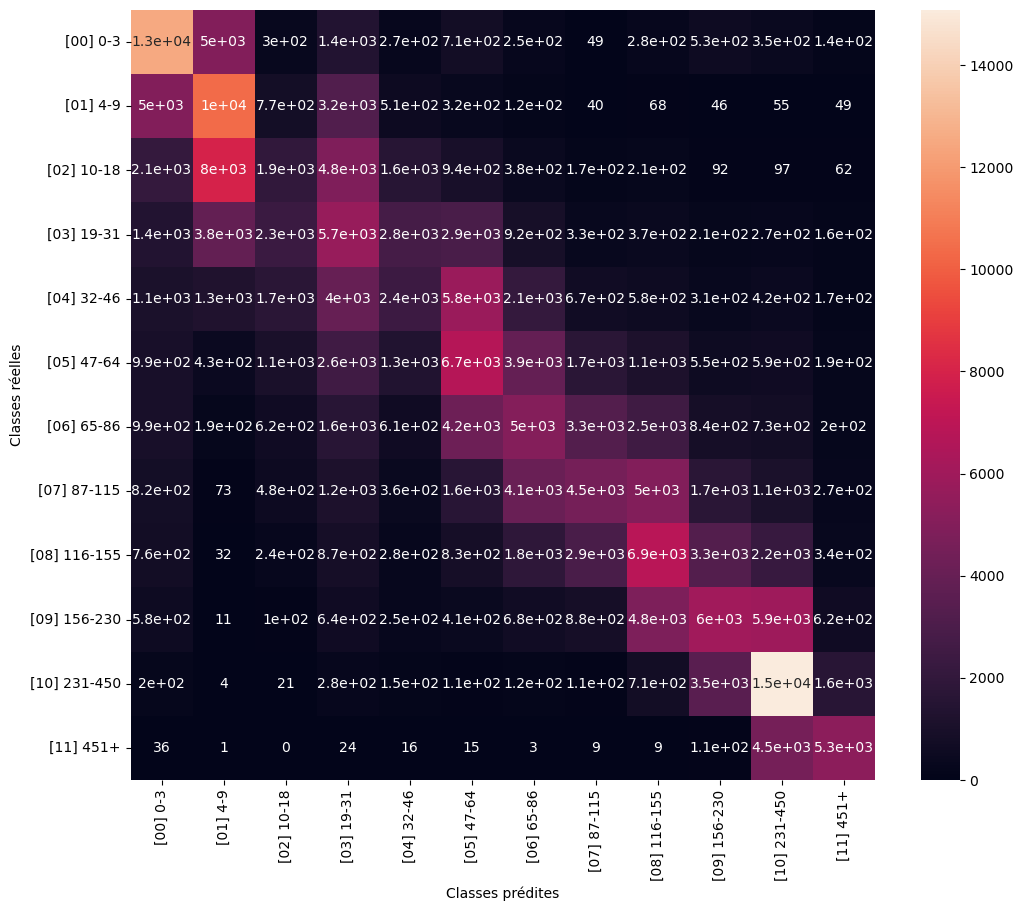

In [25]:
plt.figure(figsize=(12, 10))
sns.heatmap(matrice_confusion, annot=True)
plt.show()

In [ ]:
## Rapport de classification

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    [00] 0-3       0.47      0.58      0.52     21765
    [01] 4-9       0.36      0.51      0.42     20606
  [02] 10-18       0.20      0.10      0.13     20398
  [03] 19-31       0.22      0.27      0.24     21144
  [04] 32-46       0.23      0.12      0.15     20456
  [05] 47-64       0.27      0.32      0.29     21160
  [06] 65-86       0.26      0.24      0.25     20783
 [07] 87-115       0.31      0.21      0.25     21230
[08] 116-155       0.30      0.34      0.32     20447
[09] 156-230       0.35      0.29      0.32     20928
[10] 231-450       0.48      0.69      0.57     21875
   [11] 451+       0.58      0.53      0.56     10077

    accuracy                           0.34    240869
   macro avg       0.34      0.35      0.33    240869
weighted avg       0.33      0.34      0.33    240869

